In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

house_data = pd.read_csv('./house_prices_train.csv') # using read_csv() to load as DataFrame
df_house = pd.DataFrame(house_data)
# print(df_house)
# y_titanic_df = titanic_df['Survived']
# X_titanic_df = titanic_df.drop('Survived', axis=1)
# X_titanic_df = transform_features(X_titanic_df)
# X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

# sns.displot(np.log2(df_house['SalePrice']))
df_house['SalePrice'] = np.log2(df_house['SalePrice'])
# sns.displot(df_house['SalePrice'])

In [2]:
# data preprocessing (fill na, convert to numbers, ) -  identifying and handling the missing values.
for i in range(9):
    print(list(house_data.columns[i*9:(i+1)*9]))
    pass

nulSum = df_house.isna().sum()
nulNum = nulSum[nulSum.index[nulSum > 0]]
print(len(nulNum))

# temp = df_house[['PoolArea', 'PoolQC']]
# ind = df_house['PoolArea'].index[df_house['PoolArea'] > 0]
# lst = list(ind)
# print(df_house[['PoolArea', 'PoolQC']].iloc[lst, :])



['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour']
['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea']
['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF']
['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']
['TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea']
['GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
[

In [3]:
# 0번째 data drop : 0 또는 nul 값이 너무 많은 것들 제거

def drop_col_zero():
    data_size = df_house.shape[0]
    frstQ_size = data_size * 0.25
    # print(data_size)
    tooManyNuls = []
    for item in nulNum.items():
        if item[1] >= frstQ_size:
            pass
            tooManyNuls.append(item[0])
            print(item)
    print(tooManyNuls)
    # return tooManyNuls
    # col_to_drop = ['Id', 'MSSubClass', 'BsmtFinSF2', 
    #                'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'BsmtFullBath',
    #                'BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    #                'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
    # df_house.drop(col_to_drop, axis=1, inplace=True, errors='ignore')
    # corrWithSale.drop(col_to_drop, inplace=True, errors='ignore')
    # for drop_item in col_to_drop:
    #     if drop_item in num_columns:
    #         num_columns.remove(drop_item)

drop_col_zero()

('Alley', 1369)
('MasVnrType', 872)
('FireplaceQu', 690)
('PoolQC', 1453)
('Fence', 1179)
('MiscFeature', 1406)
['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [4]:
from sklearn.preprocessing import LabelEncoder

num_columns = df_house.select_dtypes(include=np.number).columns.tolist() # 수치형
cat_columns = df_house.select_dtypes(exclude=np.number).columns.tolist() # 범주형
print(num_columns)

# 출처 : https://gibles-deepmind.tistory.com/entry/Pandas-%EC%88%98%EC%B9%98%ED%98%95-%EC%BB%AC%EB%9F%BC%EA%B3%BC-%EB%B2%94%EC%A3%BC%ED%98%95-%EC%BB%AC%EB%9F%BC-%EA%B5%AC%EB%B6%84%ED%95%98%EA%B8%B0
corrWithSale = abs(df_house.corr(numeric_only=True)['SalePrice'])
    
a = []
for label in corrWithSale.index[corrWithSale < 0.3].tolist():
    a.append((label, '%2.3f'%(corrWithSale[label]*100)))
a

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


[('Id', '1.794'),
 ('MSSubClass', '7.396'),
 ('LotArea', '25.732'),
 ('OverallCond', '3.687'),
 ('BsmtFinSF2', '0.483'),
 ('BsmtUnfSF', '22.199'),
 ('LowQualFinSF', '3.796'),
 ('BsmtFullBath', '23.622'),
 ('BsmtHalfBath', '0.515'),
 ('BedroomAbvGr', '20.904'),
 ('KitchenAbvGr', '14.755'),
 ('EnclosedPorch', '14.905'),
 ('3SsnPorch', '5.490'),
 ('ScreenPorch', '12.121'),
 ('PoolArea', '6.980'),
 ('MiscVal', '2.002'),
 ('MoSold', '5.733'),
 ('YrSold', '3.726')]

0.07395901733239699

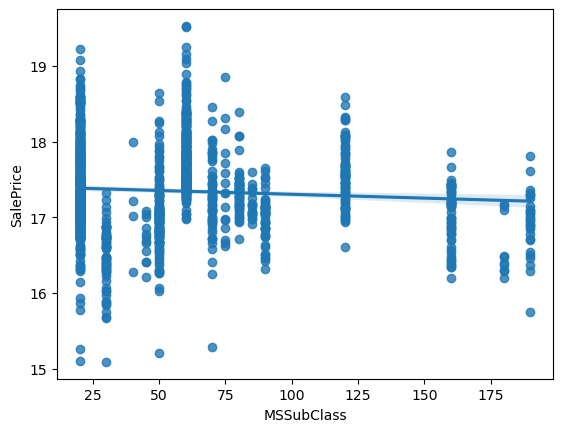

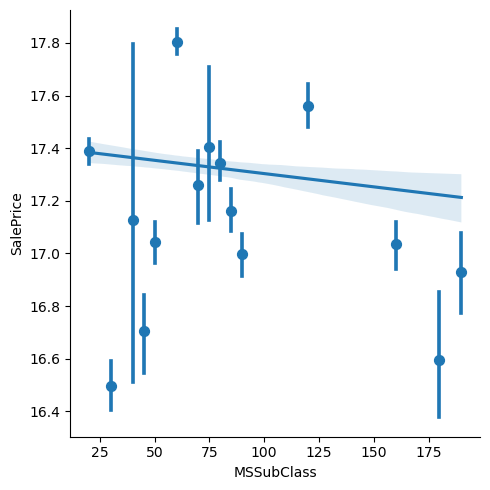

In [5]:

target = 'SalePrice'

sns.regplot(x='MSSubClass', y='SalePrice', data=df_house)
sns.lmplot(x='MSSubClass', y='SalePrice', data=df_house, x_estimator=np.mean)
# sns.lmplot(x='MSSubClass', y='SalePrice', hue='MSZoning', data=df_house)
corrWithSale['MSSubClass']

In [6]:
def drop_num_col_first():
    col_to_drop = ['Id', 'MSSubClass', 'BsmtFinSF2', 
                   'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'BsmtFullBath',
                   'BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                   'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
    df_house.drop(col_to_drop, axis=1, inplace=True, errors='ignore')
    corrWithSale.drop(col_to_drop, inplace=True, errors='ignore')
    for drop_item in col_to_drop:
        if drop_item in num_columns:
            num_columns.remove(drop_item)

drop_num_col_first()
    

In [7]:
# #'OverallCond' -- preprocessing -- corr: 3.687%

# sns.boxplot(x='OverallCond', y=target, data=df_house)
# ovc = df_house['OverallCond']
# ovc.index

df_house.drop('OverallCond', axis=1, inplace=True, errors='ignore')
corrWithSale.drop('OverallCond', inplace=True, errors='ignore')
if 'OverallCond' in num_columns:
    num_columns.remove('OverallCond')


In [8]:
#'KitchenAbvGr' -- preprocessing -- corr: 14.75%

# ovc = df_house['KitchenAbvGr']
# df_wo_irr = df_house.drop(ovc.index[ovc==0], axis=0, inplace=False)
# # sns.boxplot(x='KitchenAbvGr', y=target, data=df_wo_irr)
# sns.regplot(x='KitchenAbvGr', y=target, data=df_wo_irr)
# abs(df_wo_irr.corr(numeric_only=True)['SalePrice'])['KitchenAbvGr']

df_house.drop('KitchenAbvGr', axis=1, inplace=True, errors='ignore')
corrWithSale.drop('KitchenAbvGr', inplace=True, errors='ignore')
if 'KitchenAbvGr' in num_columns:
    num_columns.remove('KitchenAbvGr')

label: LotArea, corr: 25.73%



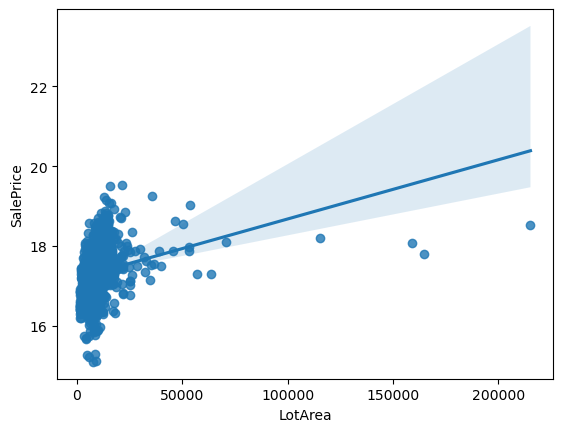

In [9]:

for label in num_columns:
    if corrWithSale[label] < 0.3:
        print('label: %s, corr: %2.2f%%\n'%(label, corrWithSale[label]*100))
        sns.regplot(x=label, y=target, data=df_house)
        plt.show()
        


In [10]:
# 'LotArea' -- preprocessing -- corr: 25.73 %

ovc = df_house['LotArea']
# print(len(ovc.index[ovc>100000]))
# df_wo_irr = df_house.drop(ovc.index[ovc>100000], axis=0, inplace=False)
# sns.regplot(x='LotArea', y=target, data=df_wo_irr)
# abs(df_wo_irr.corr(numeric_only=True)['SalePrice'])['LotArea']
df_house.drop(ovc.index[ovc>100000], axis=0, inplace=True)
corrWithSale['LotArea'] = abs(df_house.corr(numeric_only=True)['SalePrice'])['LotArea']

# 이상치 (4개) 제거 후 0.3488....


label: LotFrontage, corr: 35.59%



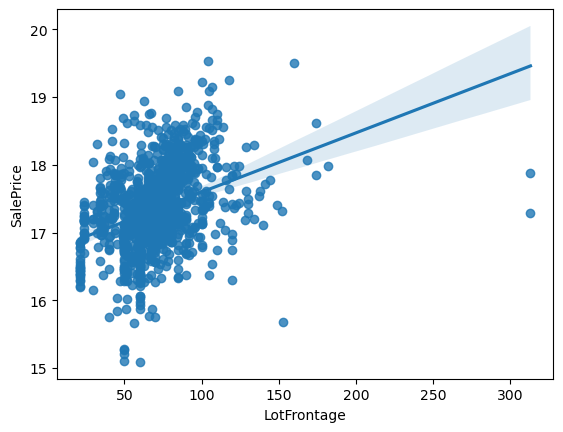

label: LotArea, corr: 34.89%



KeyboardInterrupt: 

In [11]:
for label in num_columns:
    if corrWithSale[label] < 0.4:
        print('label: %s, corr: %2.2f%%\n'%(label, corrWithSale[label]*100))
        sns.regplot(x=label, y=target, data=df_house)
        plt.show()

In [ ]:
# 2번째 data drop: 0 or NA value가 너무 많은 것들 제거.

